**Abstact:** 4 methods used to calculate the performance

In [ ]:
#input data samples
import numpy as np
data1 = np.array([3, 16, 156, 47, 246, 176, 233, 140, 130, 
        101, 166, 201, 200, 116, 118, 247, 
        209, 52, 153, 232, 128, 27, 192, 168, 208, 
        187, 228, 86, 30, 151, 18, 254, 
        76, 112, 67, 244, 179, 150, 89, 49, 83, 147, 90, 
        33, 6, 158, 80, 35, 186, 127], dtype = float)
#data = numpy.loadtxt('input_samples_50k.txt')

# Delay (lag) range that we are interesting in
lags = range(50)

## Python only implementation

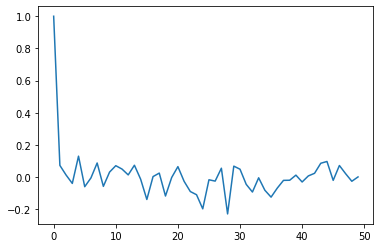

In [44]:
# Pre-allocate autocorrelation table
acorr = len(lags) * [0]

# Mean
mean = sum(data1) / len(data1) 

# Variance
var = sum([(x - mean)**2 for x in data1]) / len(data1) 

# Normalized data
ndata = [x - mean for x in data1]

# Go through lag components one-by-one
for l in lags:
    c = 1 # Self correlation
    
    if (l > 0):
        tmp = [ndata[l:][i] * ndata[:-l][i] 
               for i in range(len(data1) - l)]
        
        c = sum(tmp) / len(data1) / var
        
    acorr[l] = c

import matplotlib.pyplot as plt
plt.plot(acorr)

## Statsmodels

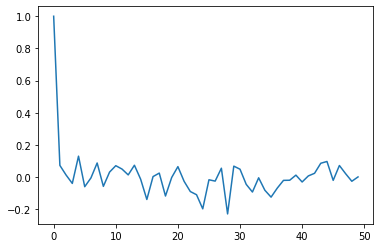

In [43]:
import statsmodels.api as sm
acorr = sm.tsa.acf(data1, nlags = len(lags)-1)
plt.plot(acorr)

## numpy correlate

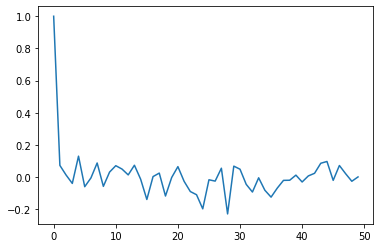

In [47]:
#x = np.array(data) 

# Mean
mean = np.mean(data1)

# Variance
var = np.var(data1)

# Normalized data
ndata = data1 - mean

acorr = np.correlate(ndata, ndata, 'full')[len(ndata)-1:]
#acorr /= np.max(acorr) 
acorr = acorr / var / len(ndata)
plt.plot(acorr)

## Fourier transform implementation

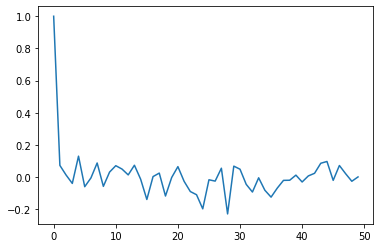

In [45]:
# Nearest size with power of 2
size = 2 ** np.ceil(np.log2(2*len(data1) - 1)).astype('int')

# Variance
var = np.var(data1)

# Normalized data
ndata = data1 - np.mean(data1)

# Compute the FFT
fft = np.fft.fft(ndata, size)

# Get the power spectrum
pwr = np.abs(fft) ** 2

# Calculate the autocorrelation from inverse FFT of the power spectrum
acorr = np.fft.ifft(pwr).real / var / len(data1)
acorr = acorr[:len(data1)]
plt.plot(acorr)